In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
#from mpl_toolkits.basemap import Basemap

Загрузка необходимых данных

In [2]:
masks = []
with open('terr_array.npy', 'rb') as file_masks:
    masks = np.load(file_masks)
masks.shape

(17, 180, 360)

In [3]:
data = pd.DataFrame()

with open('D:\Work\MAP-MODEL.npy', 'rb') as file_map_model:
    data = np.load(file_map_model)
data.shape

(366, 12, 24, 180, 360)

In [4]:
target = []
with open('D:\Work\FLASHES_ARRAY_ALL.npy', 'rb') as file_map_model:
    target = np.load(file_map_model)
target = target[:366,:,:,:]
target.shape

(366, 24, 180, 360)

In [5]:
class flashes_activity_model:
    def __init__(self, data, target, mask):
        data_current = np.zeros(shape=((mask == True).sum(), 366, 12, 24))
        target_current = np.zeros(shape=((mask == True).sum(), 366, 24))
        counter = 0
        for i in range(180):
            for j in range(360):
                if mask[i][j]:
                    data_current[counter] = data[:,:,:,i,j]
                    target_current[counter] = target[:,:,i,j]
                    counter += 1
        self.df = pd.DataFrame()
        print(data_current.shape)
        self.df['Precipitation'] = data_current[:,:,0,:].ravel()
        for i in range(11):
            self.df["cape_" + str(i)] = data_current[:,:,i + 1,:].ravel()
        y = target_current.ravel()
        self.df['y'] = y >= 1
        self.df = self.df.drop_duplicates()
        for i in range(11):
            self.df["cape_" + str(i) + " * Precipitation"] = self.df["cape_" + str(i)] * self.df["Precipitation"]
    
    
    """
    def fit_model():
        X, y = train_test_split(df.drop('y', axis=1), df['y'])
        self.linear_model = LogisticRegression()
        self.linear_model.fit()
        """


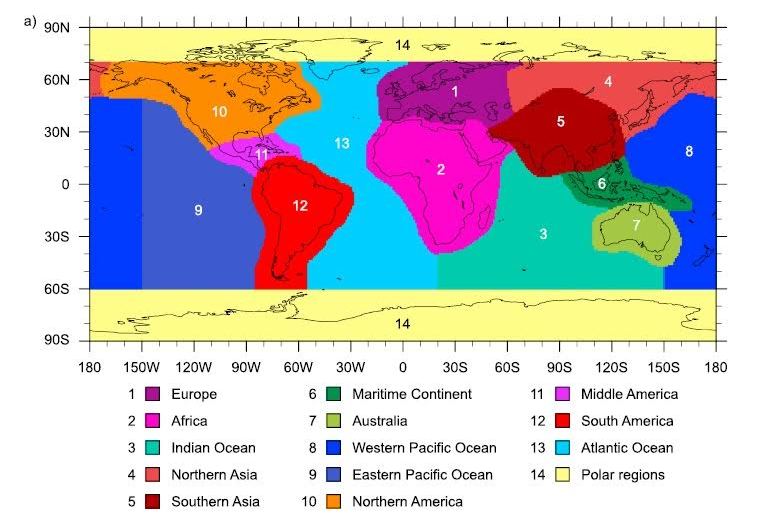
15) Суша
16) Океан

In [6]:
model_Europe = flashes_activity_model(data, target, masks[1])
"""
model_Africa = flashes_activity_model(data, target, masks[2])
model_Indian_Ocean = flashes_activity_model(data, target, masks[3])
model_Northern_Asia = flashes_activity_model(data, target, masks[4])
model_Southern_Asia = flashes_activity_model(data, target, masks[5])
model_Maritime_Conitinent = flashes_activity_model(data, target, masks[6])
model_Australia = flashes_activity_model(data, target, masks[7])
model_Western_Pacific_Ocean = flashes_activity_model(data, target, masks[8])
model_Eastern_Pacific_Ocean = flashes_activity_model(data, target, masks[9])
model_Northern_America = flashes_activity_model(data, target, masks[10])
model_Middle_America = flashes_activity_model(data, target, masks[11])
model_South_America = flashes_activity_model(data, target, masks[12])
model_Atlantic_ocean = flashes_activity_model(data, target, masks[13])
model_Polar_regions = flashes_activity_model(data, target, masks[14])
model_land = flashes_activity_model(data, target, masks[15])
model_ocean = flashes_activity_model(data, target, masks[16])
model_all = flashes_activity_model(data, target, masks[0]) 
"""


(2524, 366, 12, 24)


'\nmodel_Africa = flashes_activity_model(data, target, masks[2])\nmodel_Indian_Ocean = flashes_activity_model(data, target, masks[3])\nmodel_Northern_Asia = flashes_activity_model(data, target, masks[4])\nmodel_Southern_Asia = flashes_activity_model(data, target, masks[5])\nmodel_Maritime_Conitinent = flashes_activity_model(data, target, masks[6])\nmodel_Australia = flashes_activity_model(data, target, masks[7])\nmodel_Western_Pacific_Ocean = flashes_activity_model(data, target, masks[8])\nmodel_Eastern_Pacific_Ocean = flashes_activity_model(data, target, masks[9])\nmodel_Northern_America = flashes_activity_model(data, target, masks[10])\nmodel_Middle_America = flashes_activity_model(data, target, masks[11])\nmodel_South_America = flashes_activity_model(data, target, masks[12])\nmodel_Atlantic_ocean = flashes_activity_model(data, target, masks[13])\nmodel_Polar_regions = flashes_activity_model(data, target, masks[14])\nmodel_land = flashes_activity_model(data, target, masks[15])\nmodel

In [7]:
model_Europe.df

,Precipitation,cape_0,cape_1,cape_2,cape_3,cape_4,cape_5,cape_6,cape_7,cape_8,...,cape_1 * Precipitation,cape_2 * Precipitation,cape_3 * Precipitation,cape_4 * Precipitation,cape_5 * Precipitation,cape_6 * Precipitation,cape_7 * Precipitation,cape_8 * Precipitation,cape_9 * Precipitation,cape_10 * Precipitation
0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,4.485039,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.204806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,7.407661,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.845367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,23.177853,0.0,0.0,3.059246,0.000000,0.000000,0.000000,0.000000,7.218370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,51.890999,0.0,0.0,1.136757,0.000000,0.000000,0.000000,26.960375,46.979855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22170017,0.0,10.515067,0.0,0.0,0.000000,0.000000,9.746735,13.298436,3.787348,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22170018,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.005077,0.564863,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22170019,0.0,0.000000,0.0,0.0,5.816357,10.532666,3.086013,0.572679,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22170020,0.0,0.000000,0.0,0.0,2.074239,17.444323,10.570104,0.765903,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
model_Europe.df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12085095 entries, 0 to 22170021
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Precipitation            float64
 1   cape_0                   float64
 2   cape_1                   float64
 3   cape_2                   float64
 4   cape_3                   float64
 5   cape_4                   float64
 6   cape_5                   float64
 7   cape_6                   float64
 8   cape_7                   float64
 9   cape_8                   float64
 10  cape_9                   float64
 11  cape_10                  float64
 12  y                        bool   
 13  cape_0 * Precipitation   float64
 14  cape_1 * Precipitation   float64
 15  cape_2 * Precipitation   float64
 16  cape_3 * Precipitation   float64
 17  cape_4 * Precipitation   float64
 18  cape_5 * Precipitation   float64
 19  cape_6 * Precipitation   float64
 20  cape_7 * Precipitation   float64
 21  cape_8

In [10]:
model_Europe.df['y'].value_counts()

False    11721895
True       363200
Name: y, dtype: int64